# Notebook 4 - Data preparation, model training and evaluation



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

We're going to use the data from exercise 2, which has already been cleaned up. We'll put them in a dataframe and display the first 5 rows and the last 5.

In [56]:

df = pd.read_csv('prepared_data.csv')
df

<<<<<<< local


,year,month,startClusterName,startClusterZip,startClusterID,endClusterName,endClusterZip,endClusterID,weekday,daytime,isHoliday,distance,count,total
0,2021,3,Hunedoara,71171,3254026000002,Hunedoara,71171,3254026000007,Di,morning,Keine Ferien,medium,high,medium
1,2021,3,Turda,80982,3241013050002,Turda,80982,3241013050008,Mi,afternoon,Keine Ferien,low,medium,low
2,2021,3,Turda,80982,3241013050007,Turda,80982,3241013030001,Sa,morning,Keine Ferien,medium,medium,medium
3,2021,3,Bran,91157,3254028001012,Bran,91157,3254028001004,Fr,afternoon,Keine Ferien,low,high,low
4,2021,3,Bran,91157,3254028001003,Turda,80982,3241013070001,Fr,night,Keine Ferien,high,medium,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265481,2020,10,Turda,80982,3241013050001,Turda,80982,3241013080001,Sun,afternoon,Keine Ferien,high,low,medium
265482,2020,10,Bran,91157,3254028001012,Bran,91157,3254028001003,Mo,morning,Ferien,low,high,low
265483,2020,10,Bran,91157,3254028001013,Bran,91157,3254028003001,Di,morning,Keine Ferien,medium,medium,medium
265484,2020,10,Hunedoara,71171,3254026000014,Hunedoara,71171,3254026000003,Mo,night,Keine Ferien,high,low,medium


>>>>>>> remote
<<<<<<< local <removed>


,weekday,daytime,isHoliday,distance,count,startClusterName,startClusterZip,startClusterID,endClusterName,endClusterZip,endClusterID,year,month,total
0,Di,7,Keine Ferien,3,15,Hunedoara,71171,3254026000002,Hunedoara,71171,3254026000007,2021,3,45
1,Mi,17,Keine Ferien,0,10,Turda,80982,3241013050002,Turda,80982,3241013050008,2021,3,0
2,Sa,11,Keine Ferien,3,10,Turda,80982,3241013050007,Turda,80982,3241013030001,2021,3,30
3,Fr,13,Keine Ferien,0,15,Bran,91157,3254028001012,Bran,91157,3254028001004,2021,3,0
4,Fr,18,Keine Ferien,7,10,Bran,91157,3254028001003,Turda,80982,3241013070001,2021,3,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237482,So,17,Keine Ferien,5,5,Turda,80982,3241013050001,Turda,80982,3241013080001,2020,10,25
237483,Mo,9,Ferien,0,15,Bran,91157,3254028001012,Bran,91157,3254028001003,2020,10,0
237484,Di,9,Keine Ferien,2,10,Bran,91157,3254028001013,Bran,91157,3254028003001,2020,10,20
237485,Mo,18,Keine Ferien,5,5,Hunedoara,71171,3254026000014,Hunedoara,71171,3254026000003,2020,10,25


>>>>>>> remote <modified: text/html, text/plain>


In [57]:
# display  the unique values of count 
df['count'].unique()

array([15, 10,  5, 20])

In [58]:
# Obtain unique values and their frequencies
unique_values, counts = np.unique(df['count'], return_counts=True)

# display the resultat
for value, count in zip(unique_values, counts):
    print(f"Valeur {value} : {count} fois")

Valeur 5 : 54106 fois
Valeur 10 : 126182 fois
Valeur 15 : 40165 fois
Valeur 20 : 17034 fois


## Business Understanding: Understand and describe what the target variable is (both regression & classification)

We have a dataset consisting of 14 features, and our aim will be to create a classification and regression model to determine the number of journeys made 'count'. We can define a classification task by transforming this variable into a class of 3 elements:
 count <= 10 = 0 (low demand), count >=10 && count <=15 (normal demand) 1 and count > 15 = 2 (high demand)
To do this, we'll add a categorie_count column. 

Regression :

The target variable remains count.
The aim is to directly predict the number of trips.

In [59]:
df['categorie_count']=np.where(df['count']<10,0,np.where(df['count']>15,2,1))
df.head(10)

,weekday,daytime,isHoliday,distance,count,startClusterName,startClusterZip,startClusterID,endClusterName,endClusterZip,endClusterID,year,month,total,categorie_count
0,Di,7,Keine Ferien,3,15,Hunedoara,71171,3254026000002,Hunedoara,71171,3254026000007,2021,3,45,1
1,Mi,17,Keine Ferien,0,10,Turda,80982,3241013050002,Turda,80982,3241013050008,2021,3,0,1
2,Sa,11,Keine Ferien,3,10,Turda,80982,3241013050007,Turda,80982,3241013030001,2021,3,30,1
3,Fr,13,Keine Ferien,0,15,Bran,91157,3254028001012,Bran,91157,3254028001004,2021,3,0,1
4,Fr,18,Keine Ferien,7,10,Bran,91157,3254028001003,Turda,80982,3241013070001,2021,3,70,1
5,Sa,9,Keine Ferien,7,10,Hunedoara,71171,3254026000001,Turda,80982,3241013050002,2021,3,70,1
6,Mo,6,Keine Ferien,6,10,Hunedoara,71171,3254026000004,Hunedoara,71171,3254026000003,2021,3,60,1
7,Fr,11,Keine Ferien,4,10,Hunedoara,71171,3254026000015,Turda,80982,3241013070001,2021,3,40,1
8,Mo,19,Keine Ferien,7,10,Bran,91157,3254028001003,Hunedoara,71171,3254026000004,2021,3,70,1
9,Fr,9,Keine Ferien,3,15,Turda,80982,3241013050002,Bran,91157,3254028007001,2021,3,45,1


## 2 Look at the distribution of the target variable and correlations
We're going to display the distribution of our target value 'count' and see how it's distributed between our 3 classes, and then display the table of correlations of all our numerical values to get an overview of the system.


<<<<<<< local


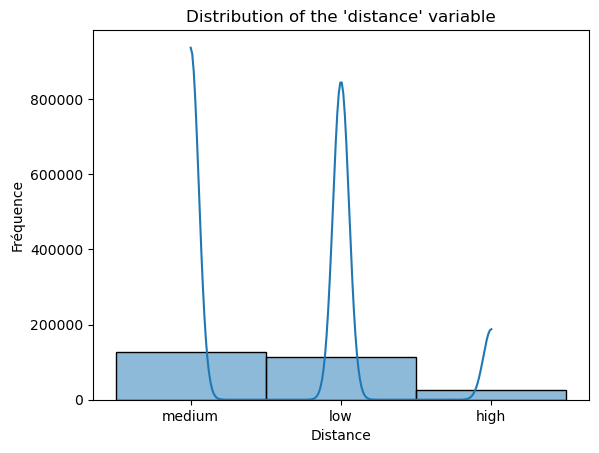

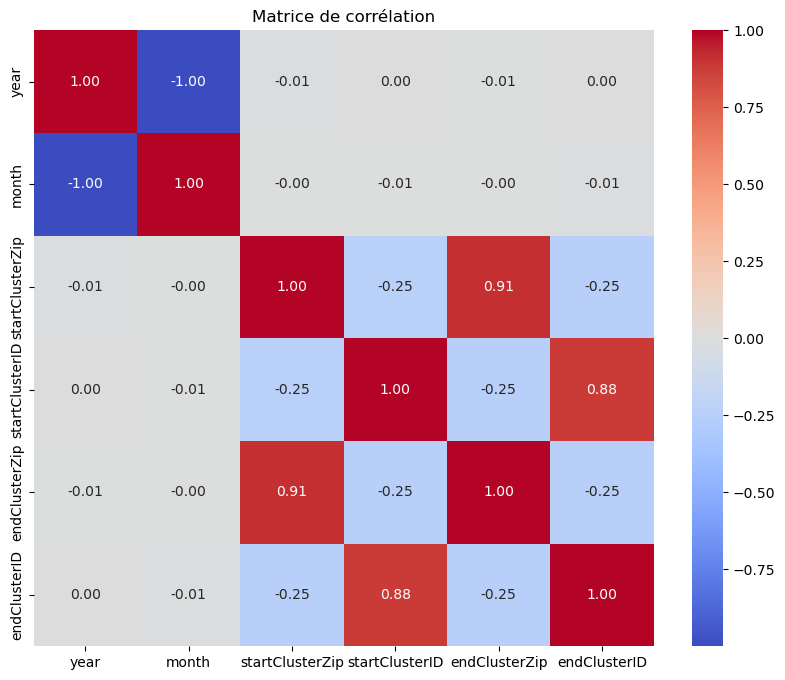

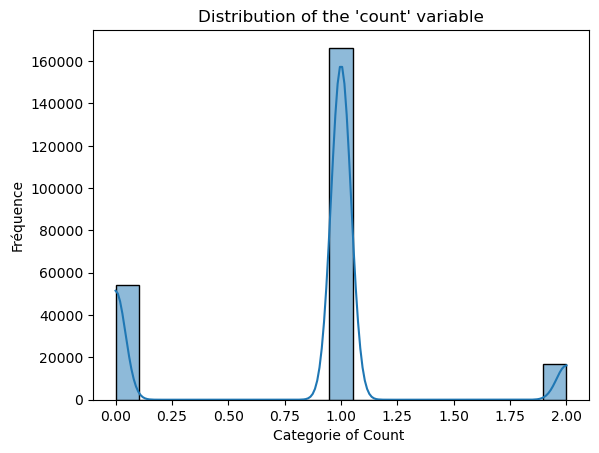

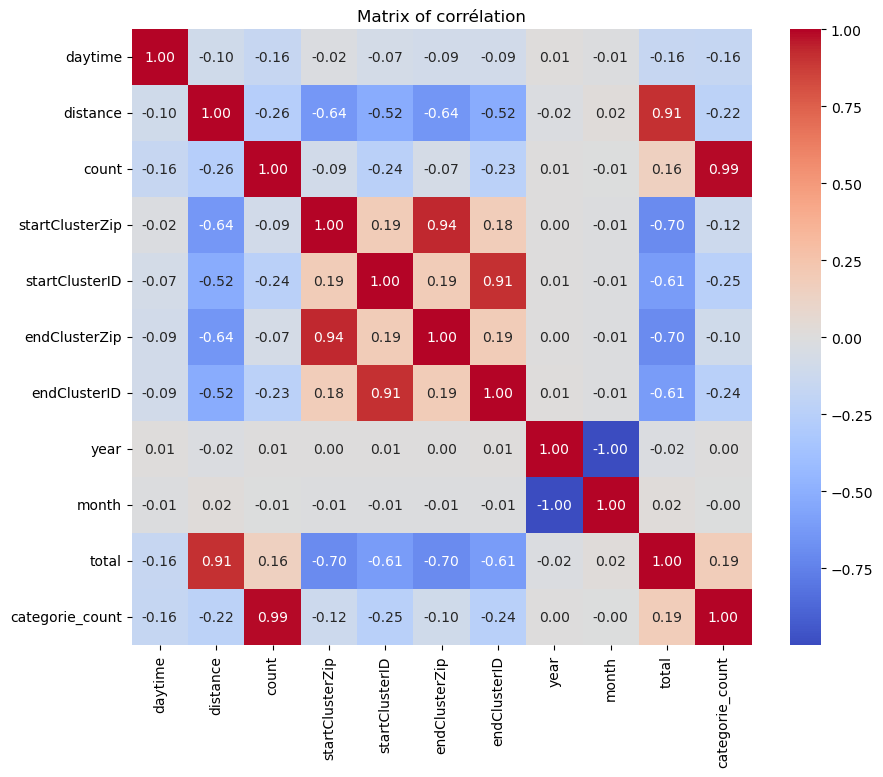

>>>>>>> remote


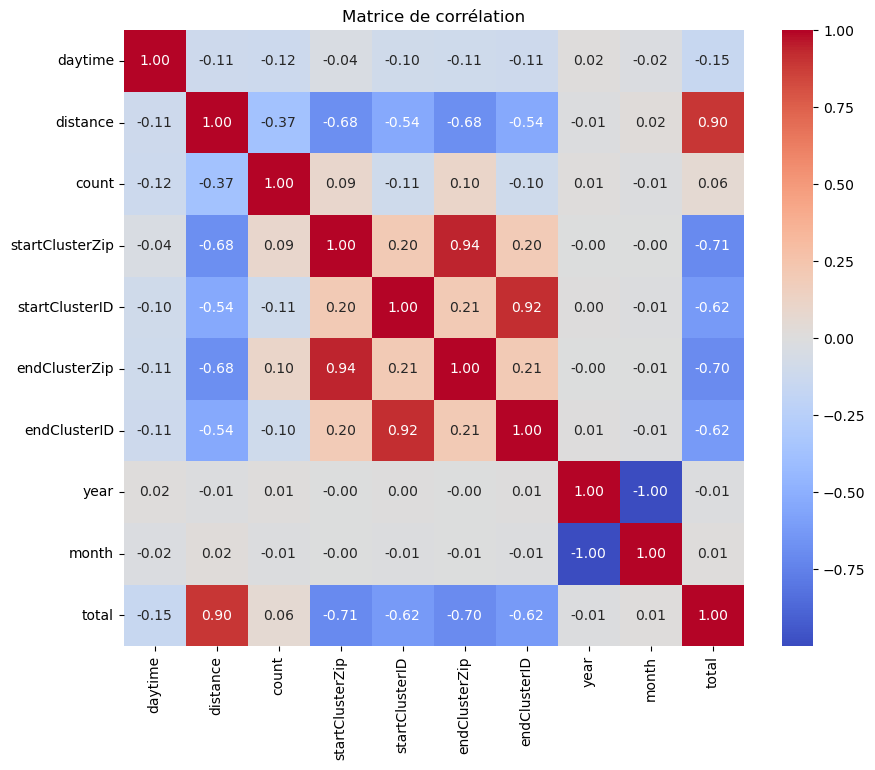

In [ ]:

# Distribution of 'count'
sns.histplot(df['categorie_count'], kde=True)
plt.title("Distribution of the 'count' variable")
plt.xlabel("Categorie of Count ")
plt.ylabel("Fréquence")
plt.show()

# correlations matrix
dfCorr = df.corr(numeric_only= True)
correlation_matrix = dfCorr.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrix of corrélation")
plt.show()


## 3 Data Reduction / Transformation & Cleansing

In view of the correlation of the data and the instructions given in the information review we need to keep collones that may be relevant to the models.


In [65]:
#Let's start by keeping only useful features
dfUtils = df.filter(['year', 'month', 'startClusterID', 'isHoliday', 'weekday', 'daytime', 'distance','count','total','categorie_count' ])
dfUtils

,year,month,startClusterID,isHoliday,weekday,daytime,distance,count,total,categorie_count
0,2021,3,3254026000002,Keine Ferien,Di,7,3,15,45,1
1,2021,3,3241013050002,Keine Ferien,Mi,17,0,10,0,1
2,2021,3,3241013050007,Keine Ferien,Sa,11,3,10,30,1
3,2021,3,3254028001012,Keine Ferien,Fr,13,0,15,0,1
4,2021,3,3254028001003,Keine Ferien,Fr,18,7,10,70,1
...,...,...,...,...,...,...,...,...,...,...
237482,2020,10,3241013050001,Keine Ferien,So,17,5,5,25,0
237483,2020,10,3254028001012,Ferien,Mo,9,0,15,0,1
237484,2020,10,3254028001013,Keine Ferien,Di,9,2,10,20,1
237485,2020,10,3254026000014,Keine Ferien,Mo,18,5,5,25,0


In [66]:
# Look the null values
print(dfUtils.isnull().sum())

year               0
month              0
startClusterID     0
isHoliday          0
weekday            0
daytime            0
distance           0
count              0
total              0
categorie_count    0
dtype: int64


In [67]:
# Dictionnaire des valeurs uniques
unique_values = {col: dfUtils[col].unique() for col in dfUtils.columns}

# Afficher le dictionnaire ou accéder à une colonne spécifique
print(unique_values)

{'year': array([2021, 2020]), 'month': array([ 3,  2,  1, 12, 11, 10]), 'startClusterID': array([3254026000002, 3241013050002, 3241013050007, 3254028001012,
       3254028001003, 3254026000001, 3254026000004, 3254026000015,
       3254028001002, 3241013050009, 3241013050001, 3254028002001,
       3254026000014, 3254026000006, 3254026000010, 3254026000008,
       3254028001013, 3254026000007, 3254026000005, 3241013080001,
       3254028001018, 3254028001006, 3254028001001, 3241013070001,
       3241013050008, 3254028007001, 3241013020002, 3254026000012,
       3254028001019, 3254028001009, 3254028001004, 3241013060001,
       3241013050006, 3254028001017, 3241013020001, 3254028001005,
       3254026000016, 3254028001015, 3254028001008, 3254028003001,
       3254026000009, 3241013010001, 3254026000013, 3254028004001,
       3254026000003, 3241013040001, 3241013030001, 3254028001014,
       3254028005001, 3254028006001]), 'isHoliday': array(['Keine Ferien', 'Ferien'], dtype=object), 'week

In [68]:
from sklearn import preprocessing
labelenc = preprocessing.LabelEncoder()

dfPrepared = dfUtils.copy()
#We're using a list here to be able to standardize it so that 
#if we need more collones in the future, we just need to add the collone to the list. 
columns_to_encode = ['weekday', 'isHoliday']

for col in columns_to_encode:
    dfPrepared[col] = labelenc.fit_transform(dfPrepared[col])
#Let's save the data we've prepared for the models so that we can save it and return to the current state.
dfPrepared.to_csv('prepared_data2.csv', index=False)

dfPrepared

,year,month,startClusterID,isHoliday,weekday,daytime,distance,count,total,categorie_count
0,2021,3,3254026000002,1,0,7,3,15,45,1
1,2021,3,3241013050002,1,3,17,0,10,0,1
2,2021,3,3241013050007,1,5,11,3,10,30,1
3,2021,3,3254028001012,1,2,13,0,15,0,1
4,2021,3,3254028001003,1,2,18,7,10,70,1
...,...,...,...,...,...,...,...,...,...,...
237482,2020,10,3241013050001,1,6,17,5,5,25,0
237483,2020,10,3254028001012,0,4,9,0,15,0,1
237484,2020,10,3254028001013,1,0,9,2,10,20,1
237485,2020,10,3254026000014,1,4,18,5,5,25,0


In [5]:

df['total_categories'] = df['total']

df['total'] = np.where(df['total']=='low', 0, 
                               np.where(df['total']=='medium', 1, 2))
df['count'] = np.where(df['count']=='low', 0, 
                               np.where(df['count']=='medium', 1, 2))
df['distance'] = np.where(df['distance']=='low', 0, 
                               np.where(df['total']=='medium', 1, 2))

df

,year,month,startClusterName,startClusterZip,startClusterID,endClusterName,endClusterZip,endClusterID,weekday,daytime,isHoliday,distance,count,total,total_categories
0,2021,3,Hunedoara,71171,3254026000002,Hunedoara,71171,3254026000007,Di,morning,Keine Ferien,2,2,1,medium
1,2021,3,Turda,80982,3241013050002,Turda,80982,3241013050008,Mi,afternoon,Keine Ferien,0,1,0,low
2,2021,3,Turda,80982,3241013050007,Turda,80982,3241013030001,Sa,morning,Keine Ferien,2,1,1,medium
3,2021,3,Bran,91157,3254028001012,Bran,91157,3254028001004,Fr,afternoon,Keine Ferien,0,2,0,low
4,2021,3,Bran,91157,3254028001003,Turda,80982,3241013070001,Fr,night,Keine Ferien,2,1,2,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265481,2020,10,Turda,80982,3241013050001,Turda,80982,3241013080001,Sun,afternoon,Keine Ferien,2,0,1,medium
265482,2020,10,Bran,91157,3254028001012,Bran,91157,3254028001003,Mo,morning,Ferien,0,2,0,low
265483,2020,10,Bran,91157,3254028001013,Bran,91157,3254028003001,Di,morning,Keine Ferien,2,1,1,medium
265484,2020,10,Hunedoara,71171,3254026000014,Hunedoara,71171,3254026000003,Mo,night,Keine Ferien,2,0,1,medium


## 4 Splitting into training & test data, stratify
The target attribute is separated from the data frame. Training and test data are split in a ratio of 70:30. Using the "stratify" option, the distribution of the target attribute is identical to that in the source data.

In [71]:
#import de train_test_split for split the data in train and test and stratify data 
from sklearn.model_selection import train_test_split

# Define target variable and predictors
y_classification = dfPrepared['categorie_count']
y_regression = dfPrepared['count']
X = dfPrepared.drop(['count'], axis=1).drop(['categorie_count'], axis=1)


# Data separation for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X, y_classification, test_size=0.3, random_state=101, stratify=y_classification)

# Data separation for regresions
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X, y_regression, test_size=0.3, random_state=101)


##  Decision Tree model
We'll use our decision tree for classification and we'll evaluate it and its ROC curve as well as its interpretation and metric values, then we'll see the regression. 

In [72]:
# import de DecisionTreeClassifier for our model and confusion_matrix and roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Train model for Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=10)
dt_classifier.fit(X_train_class, y_train_class)

# Prédictions
y_pred_class = dt_classifier.predict(X_test_class)



## Evaluation of the model
This is followed by the evaluation of the model on the test data.

In [74]:
from sklearn.metrics import classification_report

# Évaluation
print(classification_report(y_test_class, y_pred_class))
print("Confusion Matrix:\n", confusion_matrix(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95     16232
           1       0.95      0.99      0.97     49905
           2       0.99      0.79      0.88      5110

    accuracy                           0.96     71247
   macro avg       0.97      0.90      0.93     71247
weighted avg       0.96      0.96      0.96     71247

Confusion Matrix:
 [[14914  1313     5]
 [  377 49497    31]
 [   23  1052  4035]]


The absolute distribution is shown in the form of a confusion matrix.

How would you rate the quality of the model?

#  ROC Curve for Classification

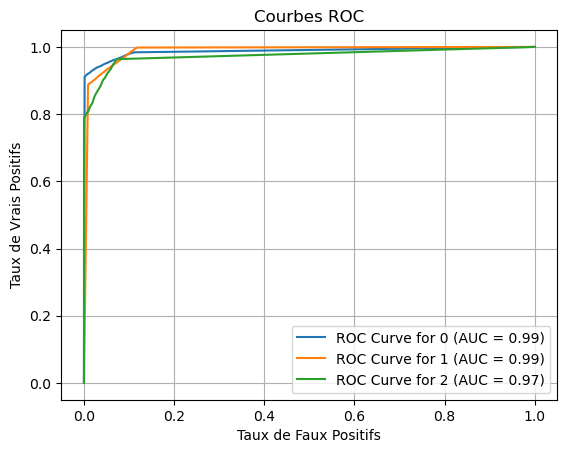

In [76]:
# Courbe ROC
from sklearn.preprocessing import label_binarize

# Binarize the true labels for multi-class classification
# Each column corresponds to a class (0, 1, 2), where 1 indicates the presence of that class
y_test_class_binarized = label_binarize(y_test_class, classes=[0, 1, 2])

# Get predicted probabilities for each class from the decision tree classifier
# y_scores is a 2D array where each row is a test instance and each column is the probability for a class
y_scores = dt_classifier.predict_proba(X_test_class)

# Loop through each class (0, 1, 2) to calculate and plot the ROC curve
for i, label in enumerate([0, 1, 2]):
    # Compute the False Positive Rate (fpr) and True Positive Rate (tpr) for the current class
    # Using the binary true labels and predicted probabilities for that class
    fpr, tpr, thresholds = roc_curve(y_test_class_binarized[:, i], y_scores[:, i])
    
    # Plot the ROC curve for the current class, and display the AUC in the label
    plt.plot(fpr, tpr, label=f"ROC Curve for {label} (AUC = {auc(fpr, tpr):.2f})")


plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
plt.title("Courbes ROC")
plt.legend(loc="best")
plt.grid()
plt.show()

## Interpretation

The decision tree classification model performs very well, with an overall precision of 96%, indicating that it correctly classifies the majority of examples. Recall is also high, particularly for classes 1 and 0 (99% and 92%), although it is slightly lower for class 2 (79%). The F1-score, a good compromise between precision and recall, remains high for all classes, with values close to 1 for classes 1 and 0. In addition, the AUC rates of the ROC curve are remarkable, with values of 0.99 for classes 0 and 1, and 0.97 for class 2, showing the model's excellent ability to discriminate between classes.The confusion matrix shows that the majority of errors concern confusion between classes 0 and 1, but these errors remain relatively low. In summary, although the model performs well overall, a slight improvement in recall for class 2 would be beneficial.

### This is the regression models for our data

In [46]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train Modèle
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train_reg, y_train_reg)

# Prédictions
y_pred_reg = dt_regressor.predict(X_test_reg)

# Évaluation and metrics 
mse = mean_squared_error(y_test_reg, y_pred_reg)
mae = mean_absolute_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 0.15
Mean Absolute Error: 0.25
R² Score: 0.65


## Interpretation

The regression model, using the Decision Tree Regressor, demonstrates moderate performance with an R² score of 0.65, indicating that the model explains 65% of the variance in the target variable. The Mean Squared Error (MSE) is 0.15, which reflects the average squared difference between the predicted and actual values, suggesting some error but not excessively large. The Mean Absolute Error (MAE) is 0.25, which indicates that, on average, the model's predictions are off by 0.25 units from the actual values. While the model is providing reasonable predictions, the relatively moderate R² score suggests that there is room for improvement, potentially through tuning the model or incorporating additional features.

# REFLEXION

One of the difficulties encountered during this process was understanding the trade-off between model complexity and performance. Initially, I expected the decision tree model for regression to perform well.  What's more, in terms of feature engineering and data pre-processing, while some features were straightforward, others required further thought and processing, such as coding categorical variables or dealing with outliers.

There were alternatives for each stage of the modeling process, including trying out other algorithms such as random forests or growth gradient machines, which often outperform decision trees in terms of generalization. However, using a decision tree gave valuable insight into the interpretability of the model and provided a good baseline. I learned that while complex models can improve accuracy, it's essential to strike a balance with the risks of overfitting and model simplicity. In addition, experimenting with different metrics (such as MAE, MSE and R²) helped me better understand model behavior and its strengths and weaknesses in real-world applications.